<a href="https://colab.research.google.com/github/nhattan206/AI_project/blob/main/Kinematic2DOF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from math import cos, sin, pi
from pandas import DataFrame
import numpy as np

theta1 = []
theta2 = []
px = []
py = []

l1 = 40
l2 = 50

for i1 in range (0,80*10):
    for i2 in range (0,170*10):
        t1 = i1/10
        t2 = i2/10
        theta1.append(t1)
        theta2.append(t2)
        px.append(round(l1*cos(t1*pi/180) + l2*cos((t1+t2)*pi/180),2))
        py.append(round(l1*sin(t1*pi/180) + l2*sin((t1+t2)*pi/180),2))
df = DataFrame(np.c_[theta1,theta2,px,py],columns = ['theta1','theta2','px','py'])
export_csv = df.to_csv (r'kinematic2DOF(ANN).csv', index = None, header=True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import np_utils
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
url = 'kinematic2DOF(ANN).csv'
data = pd.read_csv(url)
print(data.head(100))
data_x = data.drop(data.columns[:2], axis = 1)
print(data_x)
X = data_x.values.tolist()
data_y = data.drop(data.columns[2:], axis = 1)
print(data_y)
Y = data_y.values.tolist()
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2)


    theta1  theta2     px    py
0      0.0     0.0  90.00  0.00
1      0.0     0.1  90.00  0.09
2      0.0     0.2  90.00  0.17
3      0.0     0.3  90.00  0.26
4      0.0     0.4  90.00  0.35
..     ...     ...    ...   ...
95     0.0     9.5  89.31  8.25
96     0.0     9.6  89.30  8.34
97     0.0     9.7  89.29  8.42
98     0.0     9.8  89.27  8.51
99     0.0     9.9  89.26  8.60

[100 rows x 4 columns]
            px    py
0        90.00  0.00
1        90.00  0.09
2        90.00  0.17
3        90.00  0.26
4        90.00  0.35
...        ...   ...
1359995 -10.58 -7.42
1359996 -10.50 -7.45
1359997 -10.41 -7.48
1359998 -10.33 -7.51
1359999 -10.25 -7.54

[1360000 rows x 2 columns]
         theta1  theta2
0           0.0     0.0
1           0.0     0.1
2           0.0     0.2
3           0.0     0.3
4           0.0     0.4
...         ...     ...
1359995    79.9   169.5
1359996    79.9   169.6
1359997    79.9   169.7
1359998    79.9   169.8
1359999    79.9   169.9

[1360000 rows x 2 colum

In [ ]:
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_train = X_train.data.tolist()

X_test = standard_scaler.fit_transform(X_test)
X_test = X_test.data.tolist()

X_train = np.array(X_train)
X_test = np.array(X_test)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
Total params: 2,338
Trainable params: 2,338
Non-trainable params: 0
_________________________________________________________________
Epoch 1/128
6800/6800 [==============================] - 20s 3ms/step - loss: 230.0457 - mean_absolute_error: 6.3177 - val_loss: 6.2587 - val_mean_absolute_error: 1.7038
Epoch 2/128
6800/6800 [==============================] - 20s 3ms/step - loss: 3.1232 - mean_absolute_error: 1.2170 - val_loss: 1.7151 - val_mean_abs

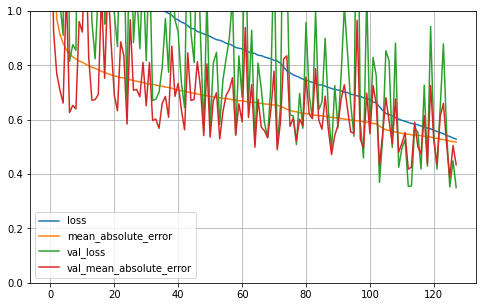

In [ ]:
#Model
model = Sequential()
model.add(Dense(64, activation='relu',kernel_initializer='normal', input_shape = (2,)))
model.add(Dense(32,activation='relu'))
model.add(Dense(2))
model.summary()
#Bien dich
model.compile(loss='mse', optimizer =RMSprop(), metrics=['mean_absolute_error'])
history = model.fit(X_train, Y_train, batch_size = 128, epochs = 128,verbose = 1, validation_split=0.2)
'''model.compile(loss='mean_squared_error',optimizer=Adam(), metrics=['mean_absolute_error'])
history = model.fit(X_train,Y_train,batch_size=64,epochs=1, verbose=1, 
                    validation_data=(X_test,Y_test))
score = model.evaluate(X_test, Y_test, verbose = 0)'''
#Save model
model.save('Kinematic2DOF.h5')
#Danh gia
score = model.evaluate(X_test, Y_test, verbose=0)
print('Sai số:', score[0])
print('Độ chính xác', score[1])
#Do thi
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
score = model.evaluate(X_test,Y_test,verbose=0)
print ('loss = ',score[0])
print ('abs error = ',score[1])

Y_predict = model.predict(X_test)
cal = pd.DataFrame(np.c_[Y_test,Y_predict],columns = ['theta1','theta2','t1 predict','t2 predict'])
cal

loss =  0.5478217601776123
abs error =  0.48231226205825806


,theta1,theta2,t1 predict,t2 predict
0,26.3,91.4,26.780735,91.303169
1,7.8,169.4,9.206034,168.886902
2,19.7,165.6,19.557446,165.371918
3,45.7,37.7,46.102402,37.366341
4,64.6,88.7,64.845444,88.279472
...,...,...,...,...
271995,68.2,85.4,68.454338,85.271095
271996,55.7,93.2,55.760078,92.678139
271997,40.0,30.4,39.817955,31.344080
271998,3.8,144.9,4.129836,144.295135
